<a href="https://colab.research.google.com/github/j23-cs167/project-2-S-Soluel/blob/main/Project2_SamSolheim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project #2
---


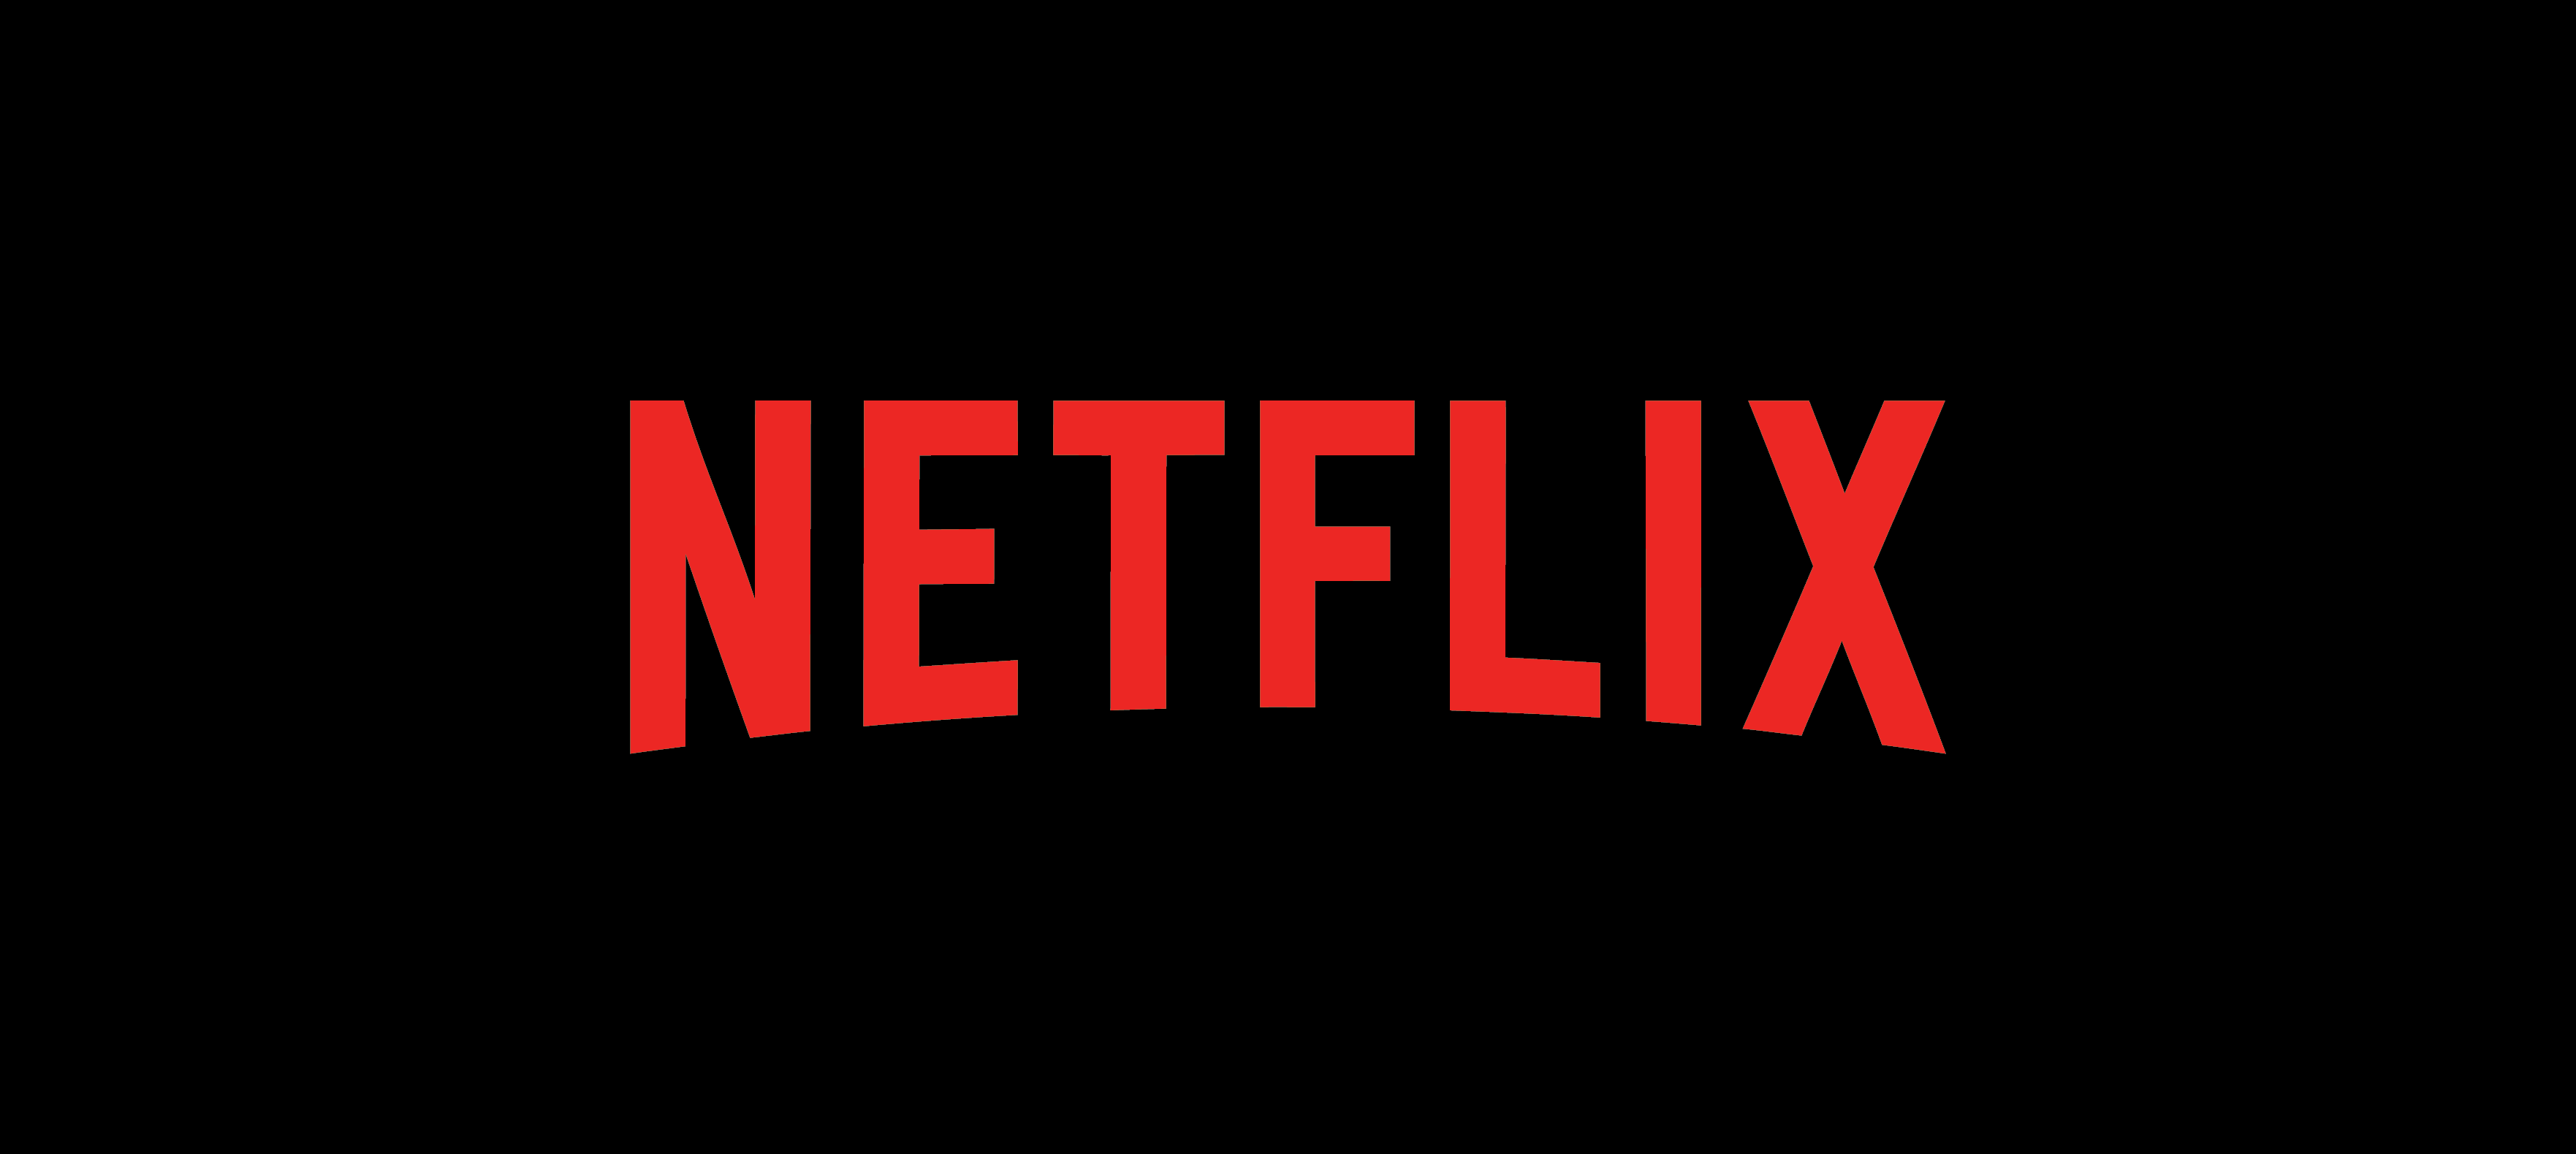

---
### **Name: Sam Solheim**
Proposed Points: 25

# 1. Problem:

> **Can we predict what imdb score a movie or tv series on Netflix will have based on the following attributes?**

- Is this a movie or series?
- When was this movie/series released?
- What is the runtime?
- How many seasons did this run for?
- How many imdb votes were submitted for this movie?


# Data Description:
The data used for this project was sourced from Kaggle user **The Devastator**, comes from their set of resources titled *'Netflix TV Shows and Movies (2022 Updated).'*

Source Link: [Netflix TV Shows and Movies (2022 Updated)](https://www.kaggle.com/datasets/thedevastator/the-ultimate-netflix-tv-shows-and-movies-dataset?select=raw_titles.csv)

---

This includes information on all the movies and tv shows on Netflix as of May 2022. It includes data such as the titles of movies and tv shows, release year, runtime, genre, etc.

As there are several attached .csv files, I will be working with the file titled `raw_titles.csv` which theoretically has had no queries passed on it. 



## Variables Utilized From Data:
The response variable that will be modeled in this project is `imdb_score`, which provides us with the corresponding **rating score** that was given to a **specified movie or tv show**. 

Since this variable is of the type double, this will be a case of regression, and we will be attempting to see how accurately we can predict the score of any move or show based on the *predictor variables* specified below. 

| **Variable Name** | **Description** |
|---------------|-------------|
| **imdb_score** | The IMDB score of the movie or TV show |
| type | The type of the movie or TV show |
| release_year | The year the movie or TV show was released |
|runtime | The runtime of the movie or TV show |
| seasons| The number of seasons of the TV show |
| imbd_votes| The number of IMDB votes for the movie or TV show |


# 2. Data Preparation
Explain your data preparation. What did you need to do to get your data in shape for your experiments? What makes you certain that the data is clean and prepared for use in your algorithm?

### First Steps: Subsets, Null Values, and Unnecessary Variables
The first goals I had upon reading in my data were to:

1.  take a glance at the data I'm working with, and create a subset containing only the variables specified above, 
1.  get an initial feel for where missing values are, and how to deal with them adequately, and
1.  look into whether some of my chosen variables can be influenced to require less dimensionality in my data. 

Once these three tasks have been completed, the data will be reconfigured into training and testing data.

---
**Addendum:** It should be noted that, while cleaning the data, the question of whether information is gained from the inclusion of the `type` variable came into the discussion. To explore this further, there will be two separate sources of data utilized in model creation and testing. 
1. Dataset without `type` column
2. Dataset including the `type` column

In [2]:
# import all necessary libraries
import sklearn # Import sklearn and necessary sublibraries
import pandas
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import neighbors
from sklearn.neighbors import KNeighborsRegressor

from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler # Import StandardScaler for normalization

from google.colab import drive
import pandas
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pandas.read_csv('/content/drive/MyDrive/JTerm2023/datasets/raw_titles.csv')
data.head()

# 1. Take a look at the data given:
# Looks like there is at least one situation where imdb_score and imdb_votes are both shown as 
# 'NaN', meaning those are null values. I will have to go in and see how prevalent those are later.

# My gut instinct is to not include any of the listed observations that have null values for imdb_score, 
# since that is what we are trying to predict.


# Now get a subset of the data with only the columns that concern this research:
data_subset = data.copy()

# print(data.columns)
# creating a list of variables used for this analysis
used_vars = ['type', 'release_year', 'runtime', 'seasons', 'imdb_score', 'imdb_votes']

data_subset = data_subset[used_vars];
print(data_subset)
# Drop the necessary variables



       type  release_year  runtime  seasons  imdb_score  imdb_votes
0      SHOW          1945       48      1.0         NaN         NaN
1     MOVIE          1976      113      NaN         8.3    795222.0
2     MOVIE          1975       91      NaN         8.2    530877.0
3     MOVIE          1979       94      NaN         8.0    392419.0
4     MOVIE          1973      133      NaN         8.1    391942.0
...     ...           ...      ...      ...         ...         ...
5801  MOVIE          2021      100      NaN         6.9        39.0
5802  MOVIE          2021       74      NaN         NaN         NaN
5803  MOVIE          2021       88      NaN         6.5        32.0
5804  MOVIE          2021      116      NaN         6.2         9.0
5805   SHOW          2021        0      1.0         8.8        16.0

[5806 rows x 6 columns]


In [4]:
#2. Look into where missing values are 

print(data_subset.isna().any())
# There are missing values in seasons, imdb_score, and imdb_votes which is not necessarily
# great looking for us. If the imdb_score is null, those instances will be deleted if there's only a 
# few of them. If there's a lot more than expected, we will most likely just have to impute or something. 

# for seasons, this actually gives us information by showing theres null values. 
# If it has a null value here, that would be an indicator to us that,
# this was a movie, and not a tv show. 

type            False
release_year    False
runtime         False
seasons          True
imdb_score       True
imdb_votes       True
dtype: bool


In [ ]:
data_subset.shape
# (5806, 6)
data_subset.seasons.value_counts(dropna=False)
# 3759 observations with no mention of season
# for the case of this model, we will be interpreting it as ALL missing values are
# movies. Absolutely no way we could justify removing more than half of all observations anyways

data_subset.imdb_score.value_counts(dropna=False)
# 523 missing values for this. Not the greatest, we would be removing
# about 9% of all data observations, so as much as I would love to simply remove these,
# it looks like we will have to impute values

data_subset.imdb_votes.value_counts(dropna=False)
# This has 539 null values listed. I think we can feasibly decide to either impute or 
# remove the observations of these that do NOT overlap woith the missing imdb_scores. 


In [6]:
# Changing values of 'NaN' to '1.0' for seasons
print("before: ", data_subset['seasons'].isna().any())

movies_seasons = 1
data_subset['seasons'].fillna(movies_seasons, inplace=True)

print("after: ", data_subset['seasons'].isna().any())
data_subset.head(7)

before:  True
after:  False


,type,release_year,runtime,seasons,imdb_score,imdb_votes
0,SHOW,1945,48,1.0,NaN,NaN
1,MOVIE,1976,113,1.0,8.3,795222.0
2,MOVIE,1975,91,1.0,8.2,530877.0
3,MOVIE,1979,94,1.0,8.0,392419.0
4,MOVIE,1973,133,1.0,8.1,391942.0
5,SHOW,1969,30,4.0,8.8,72895.0
6,MOVIE,1971,102,1.0,7.7,153463.0


In [7]:
# Imputing the imdb_scores from 'NaN' to the mean of all imdb_scores
print("before: ", data_subset['imdb_score'].isna().any())

imdb_score_mean = round(data_subset['imdb_score'].mean(), 1)
data_subset['imdb_score'].fillna(imdb_score_mean, inplace=True)

print("after: ", data_subset['imdb_score'].isna().any())
data_subset.head(7)

before:  True
after:  False


,type,release_year,runtime,seasons,imdb_score,imdb_votes
0,SHOW,1945,48,1.0,6.5,NaN
1,MOVIE,1976,113,1.0,8.3,795222.0
2,MOVIE,1975,91,1.0,8.2,530877.0
3,MOVIE,1979,94,1.0,8.0,392419.0
4,MOVIE,1973,133,1.0,8.1,391942.0
5,SHOW,1969,30,4.0,8.8,72895.0
6,MOVIE,1971,102,1.0,7.7,153463.0


In [8]:
# Imputing the imdb_votes from 'NaN' to the mean # of imdb_votes for movies and shows
print("before: ", data_subset['imdb_votes'].isna().any())

imdb_votes_mean = round(data_subset['imdb_votes'].mean(), 0)
data_subset['imdb_votes'].fillna(imdb_votes_mean, inplace=True)

print("after: ", data_subset['imdb_votes'].isna().any())
data_subset.head(7)

before:  True
after:  False


,type,release_year,runtime,seasons,imdb_score,imdb_votes
0,SHOW,1945,48,1.0,6.5,23407.0
1,MOVIE,1976,113,1.0,8.3,795222.0
2,MOVIE,1975,91,1.0,8.2,530877.0
3,MOVIE,1979,94,1.0,8.0,392419.0
4,MOVIE,1973,133,1.0,8.1,391942.0
5,SHOW,1969,30,4.0,8.8,72895.0
6,MOVIE,1971,102,1.0,7.7,153463.0


### Bump in the Road: Inclusion of the `type` Variable
---
The first significant bump in the road I experienced came when I realized I needed to figure out whether or not the `type` variable would contain any information not given from the `seasons` variable. 

There are definitely several shows out there that only had 1 season, but what I don't know currently is whether the information gained from adding the `type` variable will be significant. 

In response to this bump, I decided that I would utilize two datasets. One dataset will contain the `type` variable, while the other one will not. And these two underlying data models will be compared throughout so as to determine whether the inclusion of the variable is significant.

In [9]:
# Now that I have made it so every movie has '1.0' listed for the number of seasons,
# it seems like the type variable is less relevant to the discussion of this analysis. 

# I think what I'll do to decide whether it is best/worst to remove type entirely, 
# is that I will create two separate models on the data. One with the variable type included,
# and the other without it. 

# Whichever set of data does better throughout the various models will be chosen as the 
# final findings. 

subset_w_type = data_subset

used_vars_2 = ['release_year', 'runtime', 'seasons', 'imdb_score', 'imdb_votes']

subset_wo_type = data_subset[used_vars_2].copy()

print("Model without type:", subset_wo_type.shape)
print("Model with type:", subset_w_type.shape)


Model without type: (5806, 5)
Model with type: (5806, 6)


## Splitting Datasets into Training and Testing Sets: 

Following section is for the code behind splitting the training and testing data into the correct spots for data from both `subset_w_type` and `subset_wo_type`. 


In [10]:
# Before I can split the set of data with type included, I need to first make type
# Into dummy variables
dummy_needed = ['type']

subset_w_dummies = pandas.get_dummies(subset_w_type, columns = dummy_needed)
subset_w_dummies.head()
subset_w_dummies.columns

# Now we have two dummy variables that correlate to whether an observation is a movie
# or a tv show. These two new columns are 'type_MOVIE' and 'type_SHOW'

Index(['release_year', 'runtime', 'seasons', 'imdb_score', 'imdb_votes',
       'type_MOVIE', 'type_SHOW'],
      dtype='object')

In [11]:
# Splitting data from subset_w_type into the training and testing sets

# Make the correct predictor variables for the models without type included
response_var = 'imdb_score'
predictors_w = ['type_MOVIE', 'type_SHOW', 'release_year', 'runtime', 'seasons', 'imdb_votes']

# Split the data into training and testing sets
train_data_w, test_data_w, train_sln_w, test_sln_w = train_test_split(subset_w_dummies[predictors_w], 
                                                              subset_w_dummies[response_var], 
                                                              test_size = 0.2, random_state = 31)
print(train_data_w.shape)
print(train_sln_w.shape)
print(test_data_w.shape)
print(test_sln_w.shape)

# Dimensions look good! This set of data is ready for the next steps


(4644, 6)
(4644,)
(1162, 6)
(1162,)


In [12]:
# Splitting data from subset_wo_type into the training and testing sets

# Make the correct predictor variables for the models without type included
response_var = 'imdb_score'
predictors_wo = ['release_year', 'runtime', 'seasons', 'imdb_votes']

# Split the data into training and testing sets
train_data_wo, test_data_wo, train_sln_wo, test_sln_wo = train_test_split(subset_wo_type[predictors_wo], 
                                                              subset_wo_type[response_var], 
                                                              test_size = 0.2, random_state = 31)
print(train_data_wo.shape)
print(train_sln_wo.shape)
print(test_data_wo.shape)
print(test_sln_wo.shape)

# This looks good too! Now we can go ahead and begin creating the models based on these datasets. 


(4644, 4)
(4644,)
(1162, 4)
(1162,)


## Final Steps: Normalizing Datasets
The following sections of code allow for normalizing the testing and training datasets for both the model **without type** and the model **with type**. 

In [13]:
# Creating Normalized sets of data for train_data_w
# and test_data_w
scaler_w = StandardScaler()
scaler_w.fit(train_data_w)

traind_w_norm = scaler_w.transform(train_data_w)
testd_w_norm = scaler_w.transform(test_data_w)

print(traind_w_norm)

[[ 0.73957331 -0.73957331  0.40790423  0.89577047 -0.23632652 -0.27628716]
 [ 0.73957331 -0.73957331 -2.09779321  0.18532146 -0.23632652 -0.27594966]
 [-1.35213099  1.35213099  0.54710965 -1.5654279   0.34559308 -0.00439376]
 ...
 [ 0.73957331 -0.73957331  0.12949341 -0.60124709 -0.23632652 -0.2756238 ]
 [ 0.73957331 -0.73957331  0.12949341  0.79427776 -0.23632652  0.07005311]
 [ 0.73957331 -0.73957331  0.54710965  0.66741186 -0.23632652 -0.27330788]]


In [86]:
# Creating Normalized sets of data for train_data_wo and test_data_wo
scaler_wo = StandardScaler()
scaler_wo.fit(train_data_wo)

traind_wo_norm = scaler_wo.transform(train_data_wo)
testd_wo_norm = scaler_wo.transform(test_data_wo)

print(traind_wo_norm)



[[ 0.40790423  0.89577047 -0.23632652 -0.27628716]
 [-2.09779321  0.18532146 -0.23632652 -0.27594966]
 [ 0.54710965 -1.5654279   0.34559308 -0.00439376]
 ...
 [ 0.12949341 -0.60124709 -0.23632652 -0.2756238 ]
 [ 0.12949341  0.79427776 -0.23632652  0.07005311]
 [ 0.54710965  0.66741186 -0.23632652 -0.27330788]]


## 3. Baseline Reference Models
---
Before model creation, I created the following baseline reference models by utilizing `DummyRegressor` to see what the models in my research phase should absolutely perform better than. These thresholds are given with their respective models below. 


| Baseline Models | $R^2$ |$R^2$ *(Normalized)* |
|---|---|---|
| Baseline with `type` | -2.9583e-05| -2.9583e-05 |
| Baseline without `type` | -2.9583e-05 | -2.9583e-05|


It should be noted that these baseline models were all created using the `uniform` method of prediction, which simply means that they operated by randomly predicting what a movie/tv show's `imdb_score` was. 

When I went through and did this calculation, I found that the $R^2$ value given was actually the same for each of the four baselines. The $R^2$ value is essentially 0 for all of them. 

In [15]:
# Dummy Variable Regressor
# Creating a baseline for the model with `type`
# Non-normal
from sklearn.dummy import DummyRegressor
from sklearn.metrics import r2_score

dummy_clf = DummyRegressor(strategy='mean') #make random guesses
dummy_clf.fit(train_data_w, train_sln_w)
preds = dummy_clf.predict(test_data_w)

print('R^2 for the Model w/ type (Non-Normal): ', r2_score(test_sln_w, preds))


# Same thing, but for the normalized data

dummy_clf_n = DummyRegressor(strategy='mean') #make random guesses
dummy_clf_n.fit(traind_w_norm, train_sln_w)
preds_n = dummy_clf.predict(testd_w_norm)

print('R^2 for the Model w/ type (Normal): ', r2_score(test_sln_w, preds_n))

R^2 for the Model w/ type (Non-Normal):  -2.9582906893255156e-05
R^2 for the Model w/ type (Normal):  -2.9582906893255156e-05


In [16]:
# This will get the 'baseline' model for the option without `type`
dummy_clf = DummyRegressor(strategy='mean') #always guesses the mean
dummy_clf.fit(train_data_wo, train_sln_wo)
preds = dummy_clf.predict(test_data_wo)

print('R^2 for the Model w/out type (Non-Normal): ', r2_score(test_sln_wo, preds))


# Same thing, but for the normalized data

dummy_clf_n = DummyRegressor(strategy='mean') #always guesses the mean
dummy_clf_n.fit(traind_wo_norm, train_sln_wo)
preds_n = dummy_clf.predict(testd_wo_norm)

print('R^2 for the Model w/out type (Normal): ', r2_score(test_sln_wo, preds_n))

R^2 for the Model w/out type (Non-Normal):  -2.9582906893255156e-05
R^2 for the Model w/out type (Normal):  -2.9582906893255156e-05


# 4. Research
---
During the research phase of this project, I decided to implement the following experiments to see which models ended up working best on the two sets of data with (or without) the `type` variable included. *It should additionally be noted that, each of the following experiments will be performed on **non-normalized** and **normalized** versions of the two datasets utilized.*

1. kNN and Weighted kNN Algorithms
2. Decision Tree Models
3. Random Forest Models


**Addendum & Bump-in-the-road:** Once I started going through my models and seeing the $R^2$ values they all had, I realized that, at least for the kNN and w-kNN algorithms there is no noticable difference between the two datasets. To be less of a headache for myself and my grader, I have decided to go ahead and utilize only the model *without type* so that our model is simpler. 




## 1. kNN and Weighted kNN Algorithms

After utilizing the kNN and w-kNN algorithms with both sets of data, I have decided to instead work with the dataset that does *NOT* contain type from here on. 

In [17]:
# Creating kNN model for dataset 2 (without type) on non-normalized data
kNN_data2 = KNeighborsRegressor(n_neighbors = 5, weights = "uniform") 
# n_neighbors supplies the value for 'k'
kNN_data2.fit(train_data_wo, train_sln_wo)

kNN_data2_preds = kNN_data2.predict(test_data_wo)

kNN_data2_r2 = sklearn.metrics.r2_score(test_sln_wo, kNN_data2_preds)

print("The R^2 for a kNN algorithm at k = 5 is:", kNN_data2_r2)

# Creating kNN model for dataset 2 (without type) on normalized data
kNN_data2_norm = KNeighborsRegressor(n_neighbors = 5, weights = "uniform") 
# n_neighbors supplies the value for 'k'
kNN_data2_norm.fit(traind_wo_norm, train_sln_wo)

kNN_data2_norm_preds = kNN_data2_norm.predict(testd_wo_norm)

kNN_data2_r2_norm = sklearn.metrics.r2_score(test_sln_wo, kNN_data2_norm_preds)

print("The R^2 for a kNN algorithm at k = 5 is:", kNN_data2_r2_norm)


The R^2 for a kNN algorithm at k = 5 is: -0.06550168229889208
The R^2 for a kNN algorithm at k = 5 is: -0.020661561824287356


In [18]:
# Creating kNN model for dataset 2 (without type) on non-normalized data
wkNN_data2 = KNeighborsRegressor(n_neighbors = 5, weights = "uniform") 
# n_neighbors supplies the value for 'k'
wkNN_data2.fit(train_data_wo, train_sln_wo)

wkNN_data2_preds = wkNN_data2.predict(test_data_wo)

wkNN_data2_r2 = sklearn.metrics.r2_score(test_sln_wo, wkNN_data2_preds)

print("The R^2 for a w-kNN algorithm at k = 5 is:", wkNN_data2_r2)

# Creating kNN model for dataset 2 (without type) on normalized data
wkNN_data2_norm = KNeighborsRegressor(n_neighbors = 5, weights = "uniform") 
# n_neighbors supplies the value for 'k'
wkNN_data2_norm.fit(traind_wo_norm, train_sln_wo)

wkNN_data2_norm_preds = wkNN_data2_norm.predict(testd_wo_norm)

wkNN_data2_r2_norm = sklearn.metrics.r2_score(test_sln_wo, wkNN_data2_norm_preds)

print("The R^2 for a w-kNN algorithm at k = 5 is:", wkNN_data2_r2_norm)


The R^2 for a w-kNN algorithm at k = 5 is: -0.06550168229889208
The R^2 for a w-kNN algorithm at k = 5 is: -0.020661561824287356


In [20]:
def tuned_kNN_regression(train, train_sln, test, test_sln, k_vals, method):
  k_vals_for_loop = k_vals
  r2_at_k = [] # Initializing a list, r2_at_k, for the resulting accuracies at differing values of k

  for k in k_vals_for_loop:
    knn_loop = KNeighborsRegressor(n_neighbors = k, weights = method)
    knn_loop.fit(train, train_sln)

    preds = knn_loop.predict(test)

    r2 = sklearn.metrics.r2_score(test_sln, preds)

    r2_at_k.append(r2)

  return r2_at_k


In [21]:
k_vals = [1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]

# Tuning k for non-normalized data on kNN
r2_kNN_nn = tuned_kNN_regression(train_data_wo, train_sln_wo, test_data_wo, test_sln_wo, k_vals, 'uniform')
print(r2_kNN_nn)

# Tuning k for normalized data on kNN
r2_kNN_n = tuned_kNN_regression(traind_wo_norm, train_sln_wo, testd_wo_norm, test_sln_wo, k_vals, 'uniform')
print(r2_kNN_n)


[-0.7868010745925706, -0.06550168229889208, 0.017363115837439214, 0.050650546914785544, 0.06657311698272406, 0.0717509710076909, 0.06934335616770726, 0.07356977071376836, 0.07252776143063389, 0.07130667873718466, 0.0700252457398205, 0.07198086197887599, 0.0717009070277741, 0.07534188072206638, 0.07423489048190635, 0.07565456975171092, 0.07340231261753283, 0.07157984342106505, 0.06906302644618867, 0.07024031374854978, 0.07106602341881807, 0.06884177809329661, 0.06996538154106047, 0.07090446870953337, 0.07266127522910437, 0.07439491277675447, 0.07276701724627732, 0.0732246093656238, 0.07302500297930503, 0.07336483636228952, 0.07218768670967479]
[-0.6731541416377125, -0.020661561824287356, 0.07010455098826684, 0.09738873025869621, 0.10797958933505147, 0.11306563802548841, 0.1195402371674984, 0.12829789424702587, 0.13447711456734235, 0.14382868936349025, 0.14272797412361526, 0.1424786767153594, 0.14244975512406544, 0.14116188287850273, 0.13885825260668816, 0.13642790234887547, 0.1343573616

In [105]:
k_vals = [1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]

# Tuning k for non-normalized data on w-kNN
r2_wkNN_nn = tuned_kNN_regression(train_data_wo, train_sln_wo, test_data_wo, test_sln_wo, k_vals, 'distance')
print(r2_wkNN_nn)

# Tuning k for normalized data on w-kNN
r2_wkNN_n = tuned_kNN_regression(traind_wo_norm, train_sln_wo, testd_wo_norm, test_sln_wo, k_vals, 'distance')
print(r2_wkNN_n)

print(max(r2_wkNN_nn))
print(max(r2_wkNN_n))


0.08564265573991703
0.09806866617010179


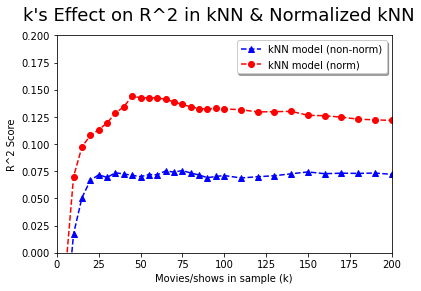

In [28]:
import matplotlib.pyplot as plt # Import matplot for graphs
%matplotlib inline

number_of_points = len(r2_kNN_nn) # get the number of points to be in the graph

# Plot this bad boy
plt.suptitle("k's Effect on R^2 in kNN & Normalized kNN", fontsize=18)
plt.xlabel('Movies/shows in sample (k)')
plt.ylabel('R^2 Score')
plt.plot(k_vals, r2_kNN_nn, 'b^--', label='kNN model (non-norm)')
plt.plot(k_vals, r2_kNN_n, 'ro--', label='kNN model (norm)')

plt.legend(loc='best', shadow=True)
plt.axis([0, 200, 0, .2])
plt.show()

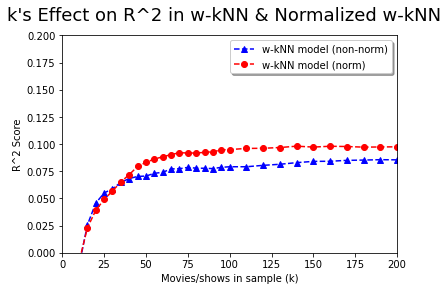

In [29]:
number_of_points = len(r2_wkNN_nn) # get the number of points to be in the graph

# Plot this bad boy
plt.suptitle("k's Effect on R^2 in w-kNN & Normalized w-kNN", fontsize=18)
plt.xlabel('Movies/shows in sample (k)')
plt.ylabel('R^2 Score')
plt.plot(k_vals, r2_wkNN_nn, 'b^--', label='w-kNN model (non-norm)')
plt.plot(k_vals, r2_wkNN_n, 'ro--', label='w-kNN model (norm)')

plt.legend(loc='best', shadow=True)
plt.axis([0, 200, 0, .2])
plt.show()

## 2. Decision Tree Models
For the decision tree models, I will be tuning the number of max leaf nodes within the model, represented as $m$. 

In [36]:
# Decision Tree based on non-normalized data

dt_non_norm = tree.DecisionTreeRegressor(splitter = "best", max_leaf_nodes = 7, 
                                          random_state = 31)
dt_non_norm.fit(train_data_wo, train_sln_wo)

dt_non_norm_preds = dt_non_norm.predict(test_data_wo)
dt_non_norm_r2 = sklearn.metrics.r2_score(test_sln_wo, dt_non_norm_preds)

print(dt_non_norm_r2)



0.13083499917506747


In [67]:
def tuned_dt_regression(train, train_sln, test, test_sln, m_vals):
  m_vals_for_loop = m_vals

  r2_at_m = []

  for m in m_vals_for_loop:
    dt_loop = tree.DecisionTreeRegressor(splitter = "best", max_depth = m, 
                                          random_state = 31)
    dt_loop.fit(train, train_sln)

    dt_loop_preds = dt_non_norm.predict(test)
    r2 = sklearn.metrics.r2_score(test_sln, dt_loop_preds)
    # Doing the same process as before with the knn & weighted kNN function
    r2_at_m.append(r2)
  return r2_at_m


In [106]:
# But we only tried a single value for the decision trees... that isn't very useful!
# Instead, we will utilize the function created prior to this, and get the R^2 values for several
# different values of m in a decision tree

m_vals = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

# Tuning m for non-normalized data in a decision tree
r2_dt_nn = tuned_dt_regression(train_data_wo, train_sln_wo, test_data_wo, test_sln_wo, m_vals)
print(r2_dt_nn)


r2_dt_n = tuned_dt_regression(traind_wo_norm, train_sln_wo, testd_wo_norm, test_sln_wo, m_vals)
print(r2_dt_n)

print(max(r2_dt_nn))
print(max(r2_dt_n))

# 0.13083499917506747 was the best r^2 value here. Honestly it's starting to seem like the data for this 
# just sucks in general. It's also rather interesting how the normalized data is doing
# worse here. 

# In the case of the non-normalized data, it seems to be doing better than the normalized data,
# but it also doesn't seem to be changing at different values of m


0.13083499917506747
-0.0032557120789820093


## 3. Random Forest Models
After going through the first few types of models on this data, it is not looking too hopeful that the data will be able to create predictions that result in a decent $R^2$ value. 

The last experiment that will be performed is with random forest models, where we will be tuning the number of trees $t$ in each forest. Fingers crossed, this will give us some decent $R^2$ values. 

Additionally, we will utilize code that will show the importances of each feature in the model. 

In [74]:
def tuned_rf_regression(train, train_sln, test, test_sln, t_vals):
  t_vals_for_loop = t_vals

  r2_at_t = []

  for t in t_vals_for_loop:
    forest_loop = RandomForestRegressor(n_estimators = t, random_state = 13
                                         , max_features = "sqrt")
    forest_loop.fit(train, train_sln)

    rf_preds = forest_loop.predict(test)
    r2 = sklearn.metrics.r2_score(test_sln, rf_preds)
    # Doing the same process as before with the knn & weighted kNN function
    r2_at_t.append(r2)
  return r2_at_t

In [108]:
# First going to do this for the non-normalized data, then the normalized data
t_vals = [50, 150, 250, 500, 750, 1000, 1250, 1500, 1750, 2000]
rf_nn = tuned_rf_regression(train_data_wo, train_sln_wo, test_data_wo, test_sln_wo, t_vals)
print(rf_nn)

rf_n = tuned_rf_regression(traind_wo_norm, train_sln_wo, testd_wo_norm, test_sln_wo, t_vals)
print(rf_n)

rf_n_w = tuned_rf_regression(traind_w_norm, train_sln_w, testd_w_norm, test_sln_w, t_vals)
print(rf_n_w)

rf_nn_w = tuned_rf_regression(train_data_w, train_sln_w, test_data_w, test_sln_w, t_vals)
print(rf_nn_w)

print(max(rf_nn))
print(max(rf_n))
print(max(rf_nn_w))
print(max(rf_n_w))

0.12749363492706967
0.12608985077748447
0.15528276824584542
0.1533714067524743


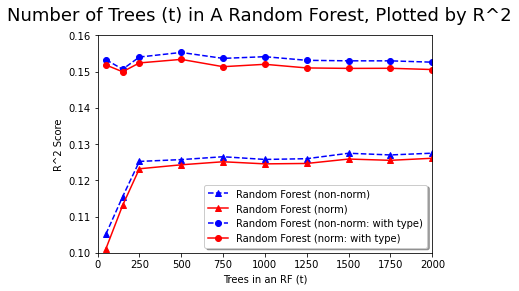

In [104]:
# Plotting based on normalized and non-normalized data
# Yet again, not getting the greatest values for R^2
# Best here is 0.12749363492706967 from the non-normalized data
# this rather quickly cements my theory that the data chosen for this was not of the 
# best quality

plt.suptitle("Number of Trees (t) in A Random Forest, Plotted by R^2", fontsize=18)
plt.xlabel('Trees in an RF (t)')
plt.ylabel('R^2 Score')
plt.plot(t_vals, rf_nn, 'b^--', label='Random Forest (non-norm)')
plt.plot(t_vals, rf_n, 'r^-', label='Random Forest (norm)')
plt.plot(t_vals, rf_nn_w, 'bo--', label='Random Forest (non-norm: with type)')
plt.plot(t_vals, rf_n_w, 'ro-', label='Random Forest (norm: with type)')


plt.legend(loc='best', shadow=True)
plt.axis([0, 2000, 0.1, .16])
plt.show()

#4. Analysis
---
It turns out, I learned a lot during this experiment. First and foremost being this: **do not automatically throw out a variable after 1 attempted experiment where results appeared the same.** 

As I progressed further into my project, I grew increasingly annoyed that the $R^2$ values of my models were not progressing any further than I had believed they would. While some of this has to do with my data not being the greatest quality, along with my need to impute several values throughout, I also belatedly realized that the addition of the `type` variable that I threw out might actually have a significant amount of use in my models. 

My educated guess is that, through imputing the values within the `seasons` variable, I most likely significantly decreased its importance. What I should have done instead was impute the null values to '0', that way it would *truly* signify which of the listed pieces of media were movies or tv shows. 

---

My recommendation from this analysis is that, for now it would be best to utilize non-normalized data in a Random Forest model. But in addition to this, I would also recommend further detailed exploration into the datasets so as to best ascertain what should be done, and which variables should be explored for significance. 

With the highest $R^2$ being 0.15528 accounting for *ALL* experiments that were done, there is much more analysis that should be done to this data. 

Rather than removing all variables that were strings right at the beginning, if I did this analysis again, I would create a feature importance chart at the very beginning to get an idea of which features would be best. At this point, the best of our models can only account for ~15% of the variations expressed by the response variable. 




| Model | Non-Normalized | Normalized |
|:---:|:---:|:---:|
| Baseline | *-2.9583e-05* | *-2.9583e-05*|
| kNN |*-0.0655* | *-0.02066* |
| w-kNN | 0.08564|0.09807 |
| Decision Tree |0.130835 | *-0.003256*|
| Random Forest |0.12749 | 0.126090|
| Random Forest *(with type)* | **0.15528**| 0.15337|


